# 비전공자를 위한 AI 딥러닝(Deep Learning)


####  And or 게이트 퍼셉트론 구현하고 그래프 그리기

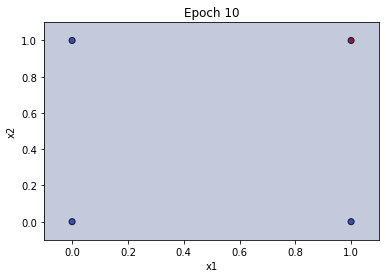

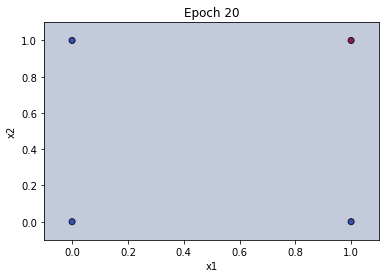

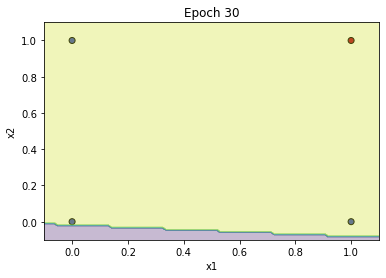

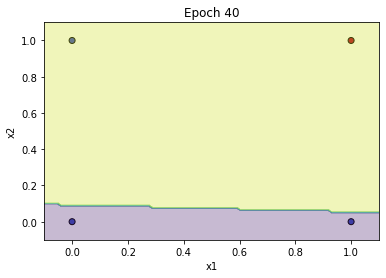

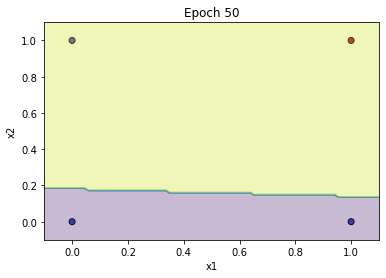

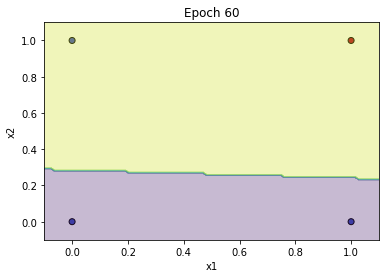

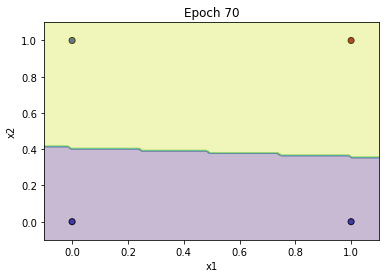

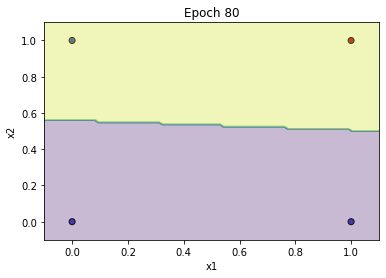

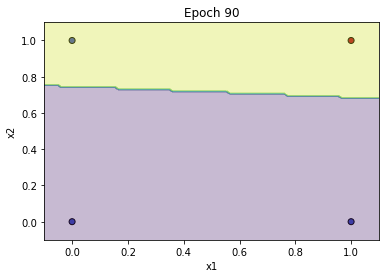

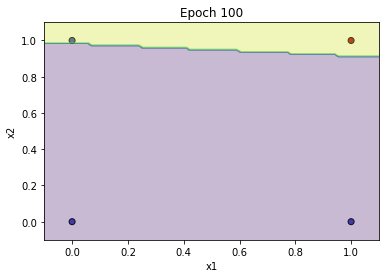

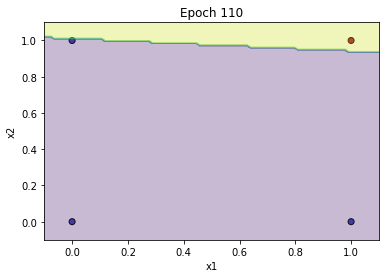

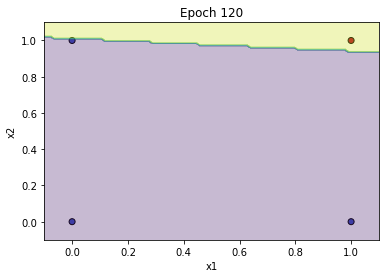

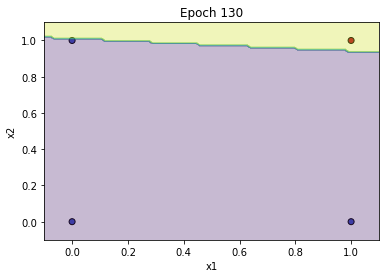

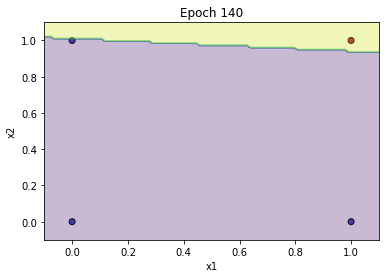

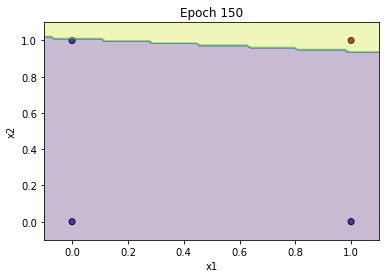

Weights after training: [-0.36667872  0.02509454  0.36290634]
[0 0]   result: 0
[0 1]   result: 0
[1 0]   result: 0
[1 1]   result: 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, lr=0.005, epochs=150, rs=None): #에폭이랑 학습비율은 내가 돌려보면서 정했다.
        if rs:
            np.random.seed(rs) # 그냥 확인할때는 랜덤시드 넣고 값을 고정시키기 편할때가 있어서 None 형식으로 구현.
        self.W = np.random.rand(input_size + 1) # 가중치는 임의로 초기화 했다. +1을 한 이유는 bias 때문에
        self.epochs = epochs 
        self.lr = lr
 
    
    def activation_fn(self, x):    
        return 1 if x >= 0 else 0 
    #활성화 함수는 간단하게 0과 1을 내뱉는 함수 활성화 함수 선정에서 실패하고 GPT의 도움을 받았다.
    
    
    def predict(self, x):
        x = np.insert(x, 0, 1)  #  BIAS를 삽입하는 부분이다. 사실 보통은 뒷부분에 넣어야 하나 결관는 똑같고 이게 간단하다.
        z = self.W.T.dot(x)     #   가중치가 상수 + X1 + 상수x1 + 상수x2 각각에 곱해줌
        a = self.activation_fn(z)  # 활성화 함수에 a의 값을 넣고 곱해준다. 일반적인 함수의 포워드와 예측 부분을 합쳐놓았다.
        return a  # 활성화 함수의 값이 크면 클수록 가중치도 커질것이다.
    
    
    def fit(self, X, Y): # 학습 파트이다.
        for epoch in range(self.epochs):  # 가끔 epch의 별 의미없다는 의미로 _ 형식으로 넣는 사람도 있더라 아마 잊어버리겠지만 이렇게도 for문을 구현 가능하다.
            for i in range(Y.shape[0]): 
                x = np.insert(X[i], 0, 1)  # Inserting 1 for bias
                y_pred = self.predict(X[i]) # y의 예측값을 구한다.
                error = Y[i] - y_pred # 손실 함수
                self.W = self.W + self.lr * error * x  #1인데 0이라면 w의 값이  작으니까 키워야함 0인데 1이라면 w의의 값이 크니까 줄여야함
    
            # 학습과정에서 그래프를 그리게 하는 것
            if (epoch + 1) % 10 == 0: # 0부터 시작하는 것을 잊으면 안 된다.
                self.plot_graph(X, Y, epoch + 1)

    #그래프를 그리게 하려면 그와 관련된 함수를 만들어야 한다.
    def plot_graph(self, X, Y, epoch): # 무엇을 변수로 할까 X에 따른 분리가 목적이므로 변수는 X으 , y 그리고  에폭횟수에 따라 그려야하므로
        plt.figure()  #액자틀같은 존재 인자를 사용해서 다양하게 꾸밀 수 있는데 인자를 사용해본적은 사이즈만...
        plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm', edgecolors='k')
        # 사실 색상은 뭘 싸도 거기서 거기다... 테두리도 사실 여기서 핵심은
        # 여기서 핵심은 X의 입력값을 어떻게 산포도 형태로 표현하는건지 그리고 그에 대한 이진 분류값을 입력하는지
        
        # Plot decision boundary (assuming 2 features)
        if X.shape[1] == 2: # x1 , x2가 똑바로 들어왔는지 확인하자 사실상 생략 가능한 파트   
            x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
            x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
            #그래프 그릴때 맨날 하는 그래프 범위  조정
            xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
            """
            ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
            나를 너무나 괴롭혔던 meshgrid함수, 모든 조합 모든행, 모든열.. 간단한데 뭔가 수학적으로 정확하게 이해가 안 된다.
            이건 너무 중요한 부분이라서 나중에 복습 목적으로 특별표시함
            ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
            """
            grid = np.c_[xx1.ravel(), xx2.ravel()] #ravel np.c 함수를 몰라서 그렇지 개념만 알면 간단.
            Z = np.array([self.predict(x) for x in grid]).reshape(xx1.shape) #클래스 내부에 매소드는 self로 소출,
            #★이 부분도 솔직히 대충은 이해가 가는데 자세히는 이해가 
            plt.contourf(xx1, xx2, Z, cmap='viridis', alpha=0.3) 
            #★이 부분도 대충은 이해가 가는데 이 부분에 대한 정확한 이해가 부족한것 같다.

        #너무나 쉬운 그냥 타이틀 넣기
        plt.title(f'Epoch {epoch}')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.show()

#  실습파트
if __name__ == "__main__": #이 부분 잘 몰랐는데 import 모듈 했을 때 실행하지 않기 위해서 사용한다고 한다.!
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 0, 0, 1])
    
    perceptron = Perceptron(input_size=2)
    perceptron.fit(X, Y)
    
    print("Weights after training:", perceptron.W)
    
    
    #출력
    for x in X:
        print(x, "  result:", perceptron.predict(x))

In [2]:
            """다시 생각해 볼 파트

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
             ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
            나를 너무나 괴롭혔던 meshgrid함수, 모든 조합 모든행, 모든열.. 간단한데 뭔가 수학적으로 정확하게 이해가 안 된다.
            이건 너무 중요한 부분이라서 나중에 복습 목적으로 특별표시함
            ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
        
            grid = np.c_[xx1.ravel(), xx2.ravel()] #ravel np.c 함수를 몰라서 그렇지 개념만 알면 간단.
            Z = np.array([self.predict(x) for x in grid]).reshape(xx1.shape) #클래스 내부에 매소드는 self로 소출,
            #★이 부분도 솔직히 대충은 이해가 가는데 자세히는 이해가 
            plt.contourf(xx1, xx2, Z, cmap='viridis', alpha=0.3)      "초기화 학인용"
            #★이 부분도 대충은 이해가 가는데 이 부분에 대한 정확한 이해가 부족한것 같다.
            """
 

'다시 생각해 볼 파트\n\nxx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))\n ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★\n나를 너무나 괴롭혔던 meshgrid함수, 모든 조합 모든행, 모든열.. 간단한데 뭔가 수학적으로 정확하게 이해가 안 된다.\n이건 너무 중요한 부분이라서 나중에 복습 목적으로 특별표시함\n★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★\n        \ngrid = np.c_[xx1.ravel(), xx2.ravel()] #ravel np.c 함수를 몰라서 그렇지 개념만 알면 간단.\nZ = np.array([self.predict(x) for x in grid]).reshape(xx1.shape) #클래스 내부에 매소드는 self로 소출,\n#★이 부분도 솔직히 대충은 이해가 가는데 자세히는 이해가 \nplt.contourf(xx1, xx2, Z, cmap=\'viridis\', alpha=0.3)      "초기화 학인용"\n#★이 부분도 대충은 이해가 가는데 이 부분에 대한 정확한 이해가 부족한것 같다.\n'